# Basics of Graphs construction with the Python Library - 'NetworkX'.

[NetworkX](https://networkx.org/) is a Python library for studying graphs and networks.

Creating Graphs with NetworkX

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (3, 3)

An empty graph can be created with nx.Graph()

In [5]:
import networkx as nx

G = nx.Graph()
len(G)

0

# Adding Nodes

Two main functions can be used to add nodes to the graph.

*   G.add_node(n)
*   G.add_nodes_from([n1,n2,...])

XWe can inspect the nodes in a graph using the G.nodes property.

Nodes:  [1, 2, 3, 4, 5]


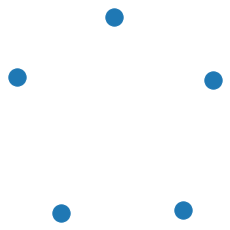

In [6]:
G.add_node(1)
G.add_nodes_from([2,3,4,5])

# inspecting the existing nodes
print("Nodes: ", G.nodes)

# draw the graph
nx.draw(G)

# Adding Edges
Two main functions can be used to add edges to the graph.

*   G.add_edge(n)
*   G.add_edges_from([n1,n2,...])

We can inspect the edges in a graph using the G.edges property

Edges:  [(1, 2), (1, 3), (1, 4), (2, 4)]


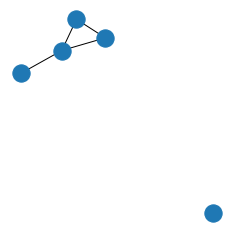

In [7]:
G.add_edge(1,2)
G.add_edges_from([(1,3), (2,4), (1,4)])

# inspect existing edges
print("Edges: ", G.edges)

# draw the graph
nx.draw(G)

# Removing Nodes and Edges

Edges can be removed with: G.remove_edge(node1, node2)

Nodes can be removed with: G.remove_node(node)

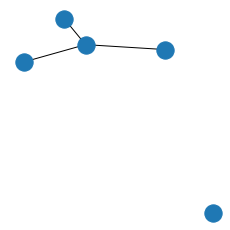

In [8]:
G.remove_edge(2,4)
nx.draw(G)

# Inspecting the Graph
4 main properties:

* G.nodes - view of the nodes/vertices in the graph
* G.edges - view of the edges in the graph
* G.adj - view of the neighbours that exist in the graph
* G.degree - view of the degrees of nodes in the graph

In [9]:
# degree view
G.degree

# sort by highest degree first:
# sorted(G.degree, key=lambda x: x[1], reverse=True)

DegreeView({1: 3, 2: 1, 3: 1, 4: 1, 5: 0})

In [10]:
# adjacency/neighbor view
print(G.adj)

{1: {2: {}, 3: {}, 4: {}}, 2: {1: {}}, 3: {1: {}}, 4: {1: {}}, 5: {}}


In [11]:
list(G.neighbors(1))

[2, 3, 4]

# Computing Graph Laplacian Matrix

In [12]:
import networkx as nx
import numpy as np

Let's generate G, a random regular graph, for the purposes of this tutorial.

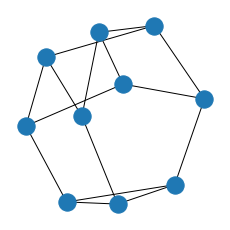

In [13]:
G = nx.random_regular_graph(3, 10)
nx.draw(G)

We can now compute the Laplacian matrix, L, using the formula: ***L = D - A.***

D = the degree matrix of G
A = the adjacency matrix of G

In [14]:
# note: toarray() converts from sparse array -> dense numpy array
A = nx.adjacency_matrix(G).toarray() 
D = np.diag(np.ones(10) * 3)
L = D - A

L

array([[ 3., -1.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.],
       [-1.,  3.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  3., -1.,  0.,  0.,  0., -1., -1.,  0.],
       [ 0.,  0., -1.,  3., -1.,  0.,  0.,  0.,  0., -1.],
       [ 0., -1.,  0., -1.,  3.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  3., -1., -1., -1.,  0.],
       [-1.,  0.,  0.,  0.,  0., -1.,  3.,  0.,  0., -1.],
       [ 0.,  0., -1.,  0., -1., -1.,  0.,  3.,  0.,  0.],
       [ 0., -1., -1.,  0.,  0., -1.,  0.,  0.,  3.,  0.],
       [-1.,  0.,  0., -1.,  0.,  0., -1.,  0.,  0.,  3.]])

We can use networkx to compute the Laplacian directly.

In [15]:
L = nx.laplacian_matrix(G).toarray()
L

array([[ 3, -1,  0,  0,  0,  0, -1,  0,  0, -1],
       [-1,  3,  0,  0, -1,  0,  0,  0, -1,  0],
       [ 0,  0,  3, -1,  0,  0,  0, -1, -1,  0],
       [ 0,  0, -1,  3, -1,  0,  0,  0,  0, -1],
       [ 0, -1,  0, -1,  3,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  3, -1, -1, -1,  0],
       [-1,  0,  0,  0,  0, -1,  3,  0,  0, -1],
       [ 0,  0, -1,  0, -1, -1,  0,  3,  0,  0],
       [ 0, -1, -1,  0,  0, -1,  0,  0,  3,  0],
       [-1,  0,  0, -1,  0,  0, -1,  0,  0,  3]])

We can verify that this matrix is equal to our more manual method with the np.array_equal(array1, array2) method.

In [16]:
np.array_equal(nx.laplacian_matrix(G).toarray(), D - A)

True

# Properties of the Laplacian Matrix
We will now look at some properties of the Laplacian matrix L, with reference to this [Wikipedia](https://en.wikipedia.org/wiki/Laplacian_matrix#Properties) section.

**L** is symmetric.



In [17]:
np.array_equal(L, L.T)

True

**L** is positive-semidefinite

In [18]:
# generate eigenvalues and eigenvectors of L
evals, evecs = np.linalg.eig(L)

# evaluate if all are zero or above
print(f"All above zero? {np.all(evals >= 0)}")

# print the (sorted) eigenvalues, smallest to largest
sorted(evals)

All above zero? False


[-8.881784197001252e-16,
 1.1206147584281827,
 1.7369225896867593,
 1.9999999999999993,
 2.48427841070866,
 3.3472963553338606,
 4.182644323595947,
 4.532088886237949,
 4.999999999999989,
 5.596154676008631]

Every row sum and column sum of **L** is zero.

In [19]:
L.sum(axis=0), L.sum(axis=1)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

**L** is singular.

In [20]:
# Taking the inverse will give LinAlgError
np.linalg.inv(L)

array([[1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15],
       [1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15],
       [1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15],
       [1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15],
       [1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
        1.12589991e+15, 1.12589991e+15],
       [1.12589991e+15, 1.12589991e+15, 1.12589991e+15, 1.12589991e+15,
   

In [21]:
# The determinant = 0 and the condition-number is very large (ill conditioned)
print("Determinant: ", np.linalg.det(L))
print("Condition Number: ", np.linalg.cond(L))

Determinant:  1.5250023466251168e-12
Condition Number:  9.884363345259923e+16


The second smallest eigenvalue of **L** is the algebraic connectivity (or Fiedler value) of G


In [22]:
print(nx.algebraic_connectivity(G))
print(sorted(evals)[1])

1.1206147584281843
1.1206147584281827


The trace of **L** is equal to **2m** where **m** is the number of edges of the considered graph.

In [23]:
np.trace(L) == 2 * len(G.edges())

True

**Algebraic Connectivity**

Algebraic Connectivity, Connected_Components, Density, Bridges

https://en.wikipedia.org/wiki/Algebraic_connectivity

The algebraic connectivity (also known as Fiedler value or Fiedler eigenvalue) of a graph G is the second-smallest eigenvalue of the Laplacian matrix of G

This eigenvalue is greater than 0 if and only if G is a connected graph.

This is a corollary to the fact that the number of times 0 appears as an eigenvalue in the Laplacian is the number of connected components in the graph.

The magnitude of this value reflects how well connected the overall graph is. It has been used in analyzing the robustness and synchronizability of networks.

In [24]:
import networkx as nx
import numpy as np
G = nx.erdos_renyi_graph(n=15, p=.25, seed=50)

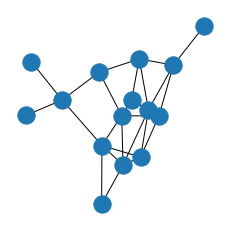

In [25]:
nx.draw(G)

We can measure how dense the graph is with the nx.density(G) function.

In [26]:
nx.density(G)

0.2571428571428571

And we can view the number of connected components: nx.number_connected_components(G).

In [27]:
nx.number_connected_components(G)

1

In [28]:
L = nx.laplacian_matrix(G).toarray()
evals, evecs = np.linalg.eig(L)
sorted(evals)

[-2.4007227329532395e-16,
 0.42348460951660405,
 0.7633831583504187,
 1.0000000000000004,
 1.4690152948434805,
 2.3310367290120766,
 3.084643283074336,
 3.588782540325124,
 4.317682394195986,
 4.571470870430381,
 5.1804060673839905,
 6.040435592646256,
 6.30987267082512,
 7.09038285748888,
 7.829403931907307]

This is also available directly in networkx with the nx.algebraic_connectivity(G) method.

In [29]:
nx.algebraic_connectivity(G)

0.4234846095166065

Since the algebraic connectivity is not zero, we know that this is a graph with a single connected component.

The number of connected components in a graph is equal to the number of times zero occurs as an eigenvalues of L

In [30]:
# find number of zero eigenvalues
# note: we use np.isclose() to mitigate floating point errors
num_zero_evals = sum(np.isclose(evals, 0))

assert num_zero_evals == nx.number_connected_components(G)

We can view the edges in a graph with the G.edges property.



In [31]:
for edge in G.edges:
  print(edge)

(0, 4)
(0, 7)
(0, 10)
(0, 11)
(1, 2)
(2, 3)
(2, 7)
(2, 13)
(4, 5)
(4, 8)
(4, 11)
(4, 12)
(5, 10)
(5, 12)
(5, 13)
(6, 7)
(6, 8)
(6, 11)
(6, 12)
(8, 9)
(8, 12)
(10, 12)
(10, 13)
(10, 14)
(11, 12)
(11, 13)
(13, 14)


Let's disconnect any edges between nodes 1-7 and nodes 8-14.

In [32]:
for node1, node2 in G.edges:
  if node1 < 8 <= node2:
    G.remove_edge(node1, node2)

Now we should have 2 distinct components in the graph.



2


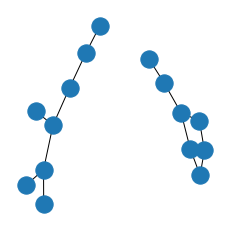

In [33]:
print(nx.number_connected_components(G))
nx.draw(G)

With a disconnected graph G, we should now see the algebraic connectivity is zero (since there are now 2 connected components).



In [34]:
nx.algebraic_connectivity(G)

0.0

We can see that the density is reduced too, because we've removed some edges.



In [35]:
nx.density(G)

0.14285714285714285

Verify by checking the eigenvalues.

In [36]:
L = nx.laplacian_matrix(G).toarray()
evals, evecs = np.linalg.eig(L)

num_zero_evals = sum(np.isclose(evals, 0))

assert num_zero_evals == nx.number_connected_components(G) == 2

Let's introduce a single connection between the two components.

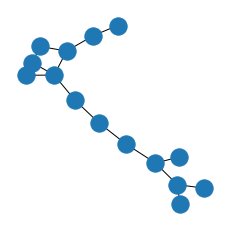

In [37]:
G.add_edge(5, 10)
nx.draw(G)

The edge we have just introduced forms a bridge in the graph. This is a bridge because if we removed this edge between the nodes, we would increase the number of connected components by one.

We can look at the bridges in the graph using nx.bridges(G).

In [38]:
bridges = list(nx.bridges(G))
print(bridges)

[(0, 4), (0, 7), (1, 2), (2, 3), (2, 7), (4, 5), (5, 10), (6, 7), (8, 9), (8, 12)]


Let's verify that, if we remove the edge involved in a bridge, then the number of connected components increases by one.



In [39]:
G2 = G.copy()
G2.remove_edge(*bridges[0])

Drawing the graph shows that it now has 2 connected components.

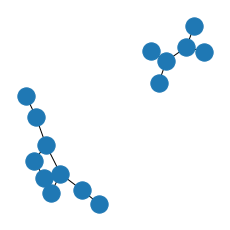

In [40]:
nx.draw(G2)

If we now remove a second bridge, we should see that this creates another connected component.

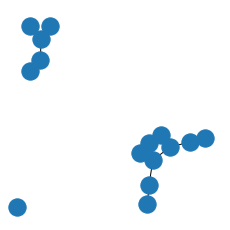

In [41]:
G2.remove_edge(*next(nx.bridges(G2)))
nx.draw(G2)

# Dense Graphs
Let's introduce a highly connected random graph - one that is not far off a complete graph (which would have every node connected by an edge to every other node).

Using the nx.erdos_renyi_graph() generator, we specify a probability of 0.9 that a connection/edge will exist between any pair of nodes in the graph.

In [42]:
G = nx.erdos_renyi_graph(n=15, p=.9, seed=50)

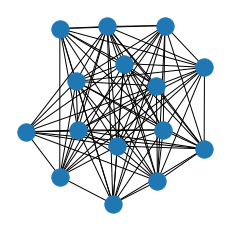

In [43]:
nx.draw(G)

Because there are many more connected pairs of nodes, the density of this graph is also much higher.

In [44]:
nx.density(G)

0.8761904761904762

We can also see higher values in the graph Laplacian's eigenspectrum.|

In [45]:
evals, evecs = np.linalg.eig(nx.laplacian_matrix(G).toarray())

sorted(evals)

[0.0,
 9.648999926420336,
 10.611248525939267,
 11.641082355198224,
 11.88217874114587,
 11.999999999999998,
 13.000000000000007,
 13.231165518461626,
 13.570528109518081,
 14.248213410375001,
 14.488735966646964,
 14.6778474462947,
 14.999999999999998,
 14.999999999999998,
 15.000000000000007]

We should also find that, because this graph is very dense, we don't have as many bridges.

In [46]:
list(nx.bridges(G))

[]

As we can see, there are actually no bridges in this graph. Thus, there is no edge that we can remove that would disconnect this graph.

**Addendum: Cliques**

A clique in a graph is a set of vertices/nodes where each node is connected to all other nodes in the set. For example, if nodes [1,2,3] are involved in clique, then:

node1 is connected to node2 and node3
node2 is connected to node1 and node3
node3 is connected to node1 and node2.
A clique is a complete subgraph of the graph G.

We can find cliques in networkx using the nx.find_cliques(G) function.

In [47]:
cliques = list(nx.find_cliques(G))
maximal_clique = max(cliques)  # get clique of maximum length
print(maximal_clique)

[4, 7, 9, 10, 13, 5, 8, 14]


We can create an induced subgraph consisting of just the nodes involved in the clique.

The G.subgraph(nodelist) function creates a subgraph consisting of the nodes passed in.

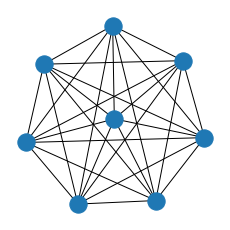

In [48]:
subgraph = G.subgraph(maximal_clique)
nx.draw(subgraph)

We can see, as per the definition of a clique, that this is a complete graph - each node is connected to all other nodes.

A related fact - the graph density of the clique will be equal to 1.

In [50]:
nx.density(subgraph)

1.0